In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)
plt.style.use('ggplot')

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("Data/data.csv")
print("shape:", df.shape)
df.head()

shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
df.iloc[:, 1:].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# checking datatypes of features
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [17]:
# check for missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [18]:
# The last feature "Unnamed: 32" has all NaN values. 
# So the last feature and id's removed from the datafame.

df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Malignant :  212
Number of Benign:  357


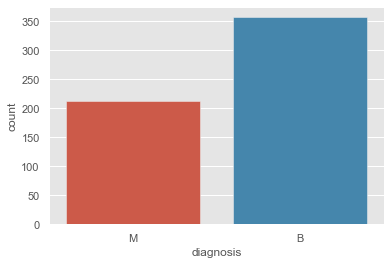

In [23]:
# Let's plot the count plot of the diagnosis feature to
# analyze the balance of the dataset.

ax = sns.countplot(df['diagnosis'], label="Count")
B, M = df['diagnosis'].value_counts()

print('Number of Malignant : ', M)
print('Number of Benign: ', B)

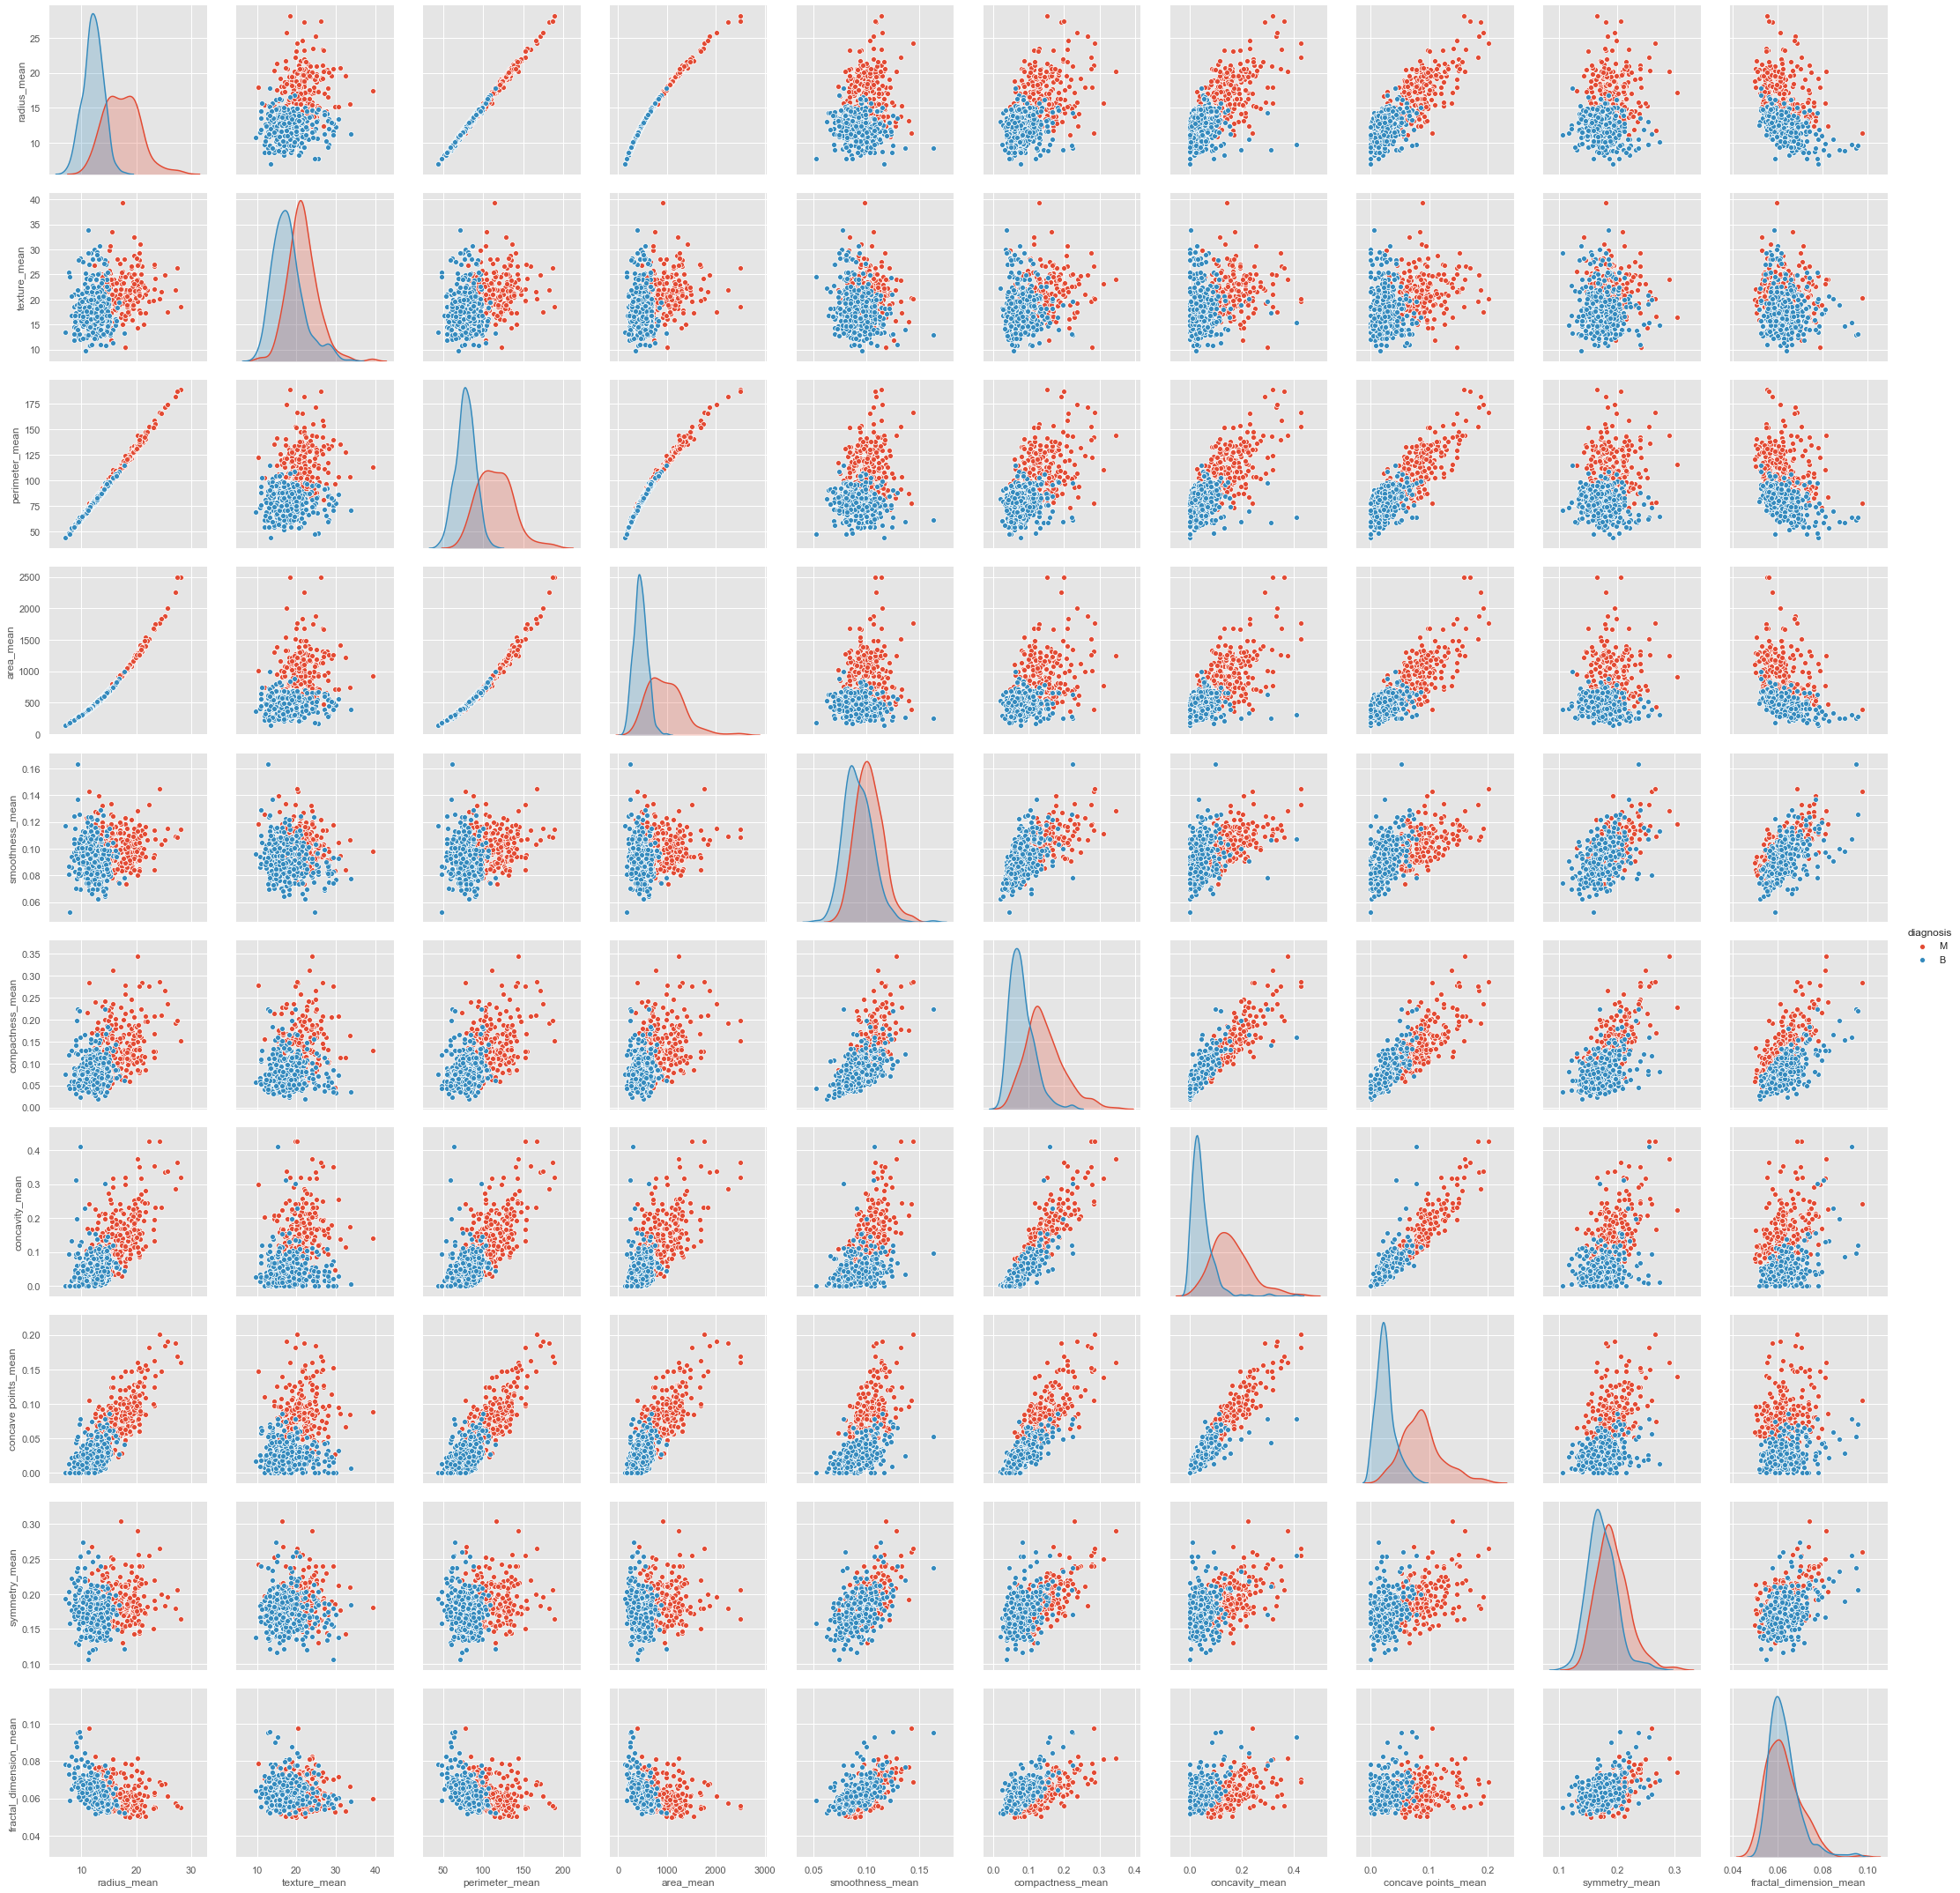

In [31]:
# Using sns pairplot (like pandas scatter matrix), we can examine the relationships
# of different values of different mean features on predicting whether the cancer is malignant or benign.
sns.pairplot(df.loc[:, list(df.columns[1:11]) + ['diagnosis']], hue = "diagnosis", height = 3)
plt.show()

In [ ]:
# using simple map function, 
# we will change the categorical variable "diagnosis" which is 'M' or 'B' to numerically.
# M -> 1, B -> 0
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

In [ ]:
# we can analyze the correlation between features using a heat map.
plt.figure(figsize=(30,15))
corr = df.corr()
sns.heatmap(corr, annot=True)
corr

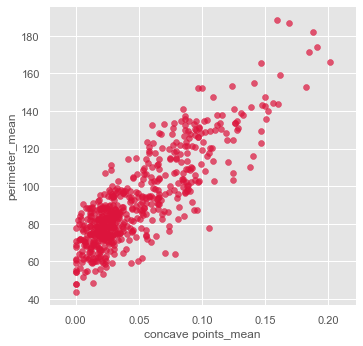

In [229]:
# Using scatterplot, we can draw the correlation between the two variables.
# corr(concavity_mean, compactness_mean) ~ 0.88
# let's draw the plot for these two features.
fig, ax = plt.subplots(figsize=(5.5,5.5))
ax.scatter(df['concave points_mean'], df['perimeter_mean'], color = 'crimson', alpha = 0.7)
ax.set_xlabel('concave points_mean')
ax.set_ylabel('perimeter_mean')
plt.show()

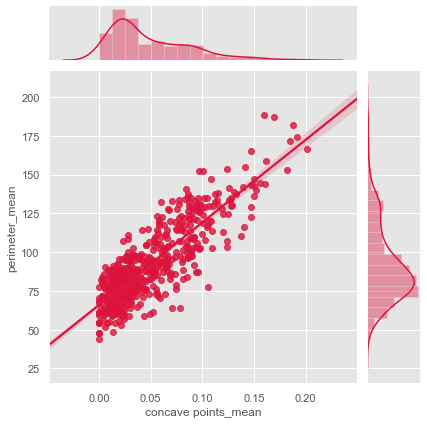

In [219]:
# regression
sns.jointplot(df.loc[:,'concave points_mean'], df.loc[:,'perimeter_mean'], 
              kind="reg", color="crimson")

In [138]:
# splitting the dataset
from sklearn import preprocessing

X = df.iloc[:, 1:]
y = df[['diagnosis']]

# create the normalized dataset (ND)
min_max_scaler = preprocessing.MinMaxScaler()
ND = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns, index=X.index)

ND.head()

# # Original Dataset (OD)
# OD_X_train, OD_X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # Normalized Dataset (ND)
# ND_X_train, ND_X_test, y_train, y_test = train_test_split(ND, y, 
#                                                           test_size=0.2, random_state=0)

# print("Original dataset -> train:", len(OD_X_train), "test:",len(OD_X_test), 
#       "\nNormalized dataset -> train:", len(ND_X_train), "test:", len(ND_X_test))


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


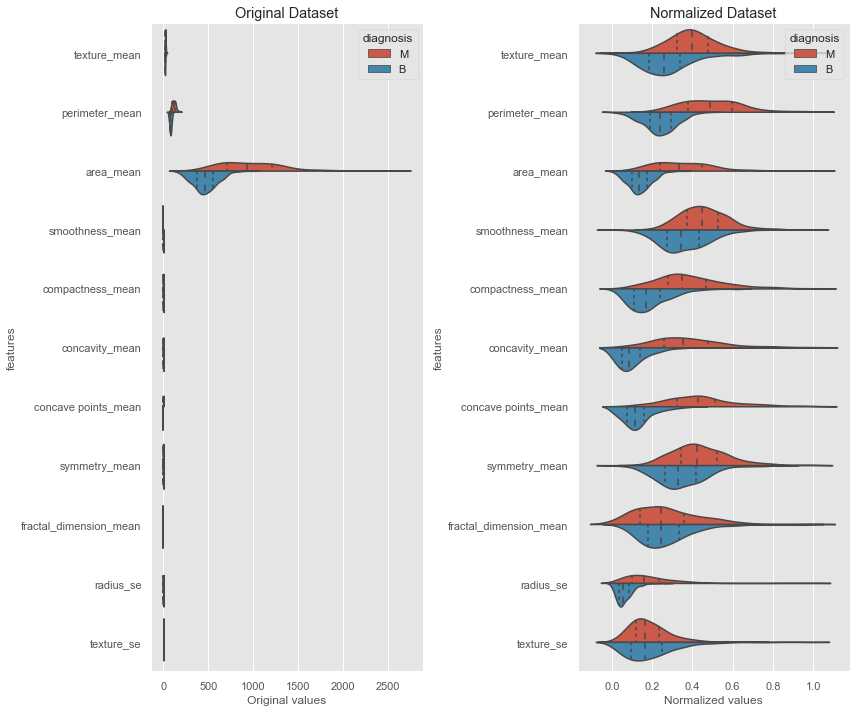

In [156]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))

OD_data = pd.concat([y, X.iloc[:,1:12]], axis=1)
ND_data = pd.concat([y, ND.iloc[:,1:12]], axis=1)

OD_data = pd.melt(OD_data, id_vars="diagnosis", var_name="features", value_name='Original values')
ND_data = pd.melt(ND_data,id_vars="diagnosis", var_name="features", value_name='Normalized values')

axes[0].set_title('Original Dataset')
sns.violinplot(x = "Original values", y = "features", hue = "diagnosis", 
               data=OD_data, split=True, inner="quartile", orient='h', ax=axes[0])

axes[1].set_title('Normalized Dataset')
sns.violinplot(x = "Normalized values", y = "features", hue = "diagnosis", 
               data=ND_data, split=True, inner="quartile", orient='h', ax=axes[1])

fig.tight_layout()

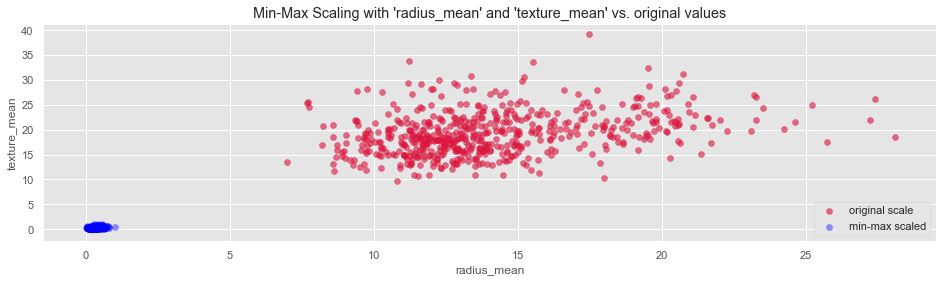

In [167]:
# let's observe the two features comparatively 
# from the data set we scaled with Min-Max scaling.
plt.figure(figsize=(16,4))

plt.scatter(df['radius_mean'], df['texture_mean'], color='crimson', label='original scale', alpha=0.6)
plt.scatter(ND.iloc[:,1], ND.iloc[:,2], color='blue', label='min-max scaled', alpha=0.4)

plt.title("Min-Max Scaling with 'radius_mean' and 'texture_mean' vs. original values")
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Cluster the OD dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10)
y_kmeans = kmeans.fit_predict(X)
# print("Accuracy score:", accuracy_score(df['diagnosis'], y_kmeans))

# Visualising the clusters
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c='blue', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c='red', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=100, c='orange', label='Centroids')
plt.title('K-means clustering of original dataset')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.legend()
plt.show()

In [ ]:
# Cluster the OD dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(normalized_data)
print("Accuracy score:", accuracy_score(df['diagnosis'], y_kmeans))

# Visualising the clusters
plt.figure(figsize=(8,5))
plt.scatter(ND[y_kmeans == 0, 0], ND[y_kmeans == 0, 1], c='blue', label='Cluster 1')
plt.scatter(ND[y_kmeans == 1, 0], ND[y_kmeans == 1, 1], c='red', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='yellow', label='Centroids')
plt.title('K-means clustering of normalized dataset')
plt.legend()
plt.show()

In [ ]:
# using RandomForestClassifier to select features based on feature importance.
clf = RandomForestClassifier(n_estimators=1000, random_state=0)

RF_selector = SelectFromModel(clf)
RF_selector.fit(X, y)
RF_selector_support = RF_selector.get_support()

# isolate the df with selected features then return them as a list
selected_features = X.loc[:,RF_selector_support].columns.tolist()

print(len(selected_features), "Selected features:", selected_features)

In [ ]:
# Train the classifier
clf.fit(X_train, y_train)

# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

In [ ]:
X_selected_train = RF_selector.transform(X_train)
X_selected_test = RF_selector.transform(X_test)

In [ ]:
clf_for_selection = RandomForestClassifier(n_estimators=1000, random_state=0)

clf_for_selection.fit(X_selected_train, y_train)

selection_pred = clf_for_selection.predict(X_selected_test)

accuracy_score(y_test, selection_pred)